# Submission 1
## Artificial Intelligence

Gargeya Sharma (220278025) **ec22146**

>**Disclaimer**: My code in the notebook is clearly inspired from lab 2 and 4 on *Uninformed Local Search* and *Genetic Algorithms* respectively.

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rcParams["figure.dpi"] = 120

In [2]:
df = pd.read_csv("tubedata.csv", header=None)
df.head()

,0,1,2,3,4,5
0,Harrow & Wealdstone,Kenton,Bakerloo,3,5,0
1,Kenton,South Kenton,Bakerloo,2,4,0
2,South Kenton,North Wembley,Bakerloo,2,4,0
3,North Wembley,Wembley Central,Bakerloo,2,4,0
4,Wembley Central,Stonebridge Park,Bakerloo,3,4,0


In [3]:
station_dict = defaultdict(list)
zone_dict = defaultdict(set)
# get data row by row
for index, row in df.iterrows():
    start_station = row[0]
    end_station = row[1]
    act_cost = int(row[3])
    zone1 = row[4]
    zone2 = row[5]
    # station dict. of child station tuples (child name, cost from parent to the child)
    # {"Mile End": [("Stepney Green", 2), ("Wembley", 1)]}
    station_list = station_dict[start_station]
    station_list.append((end_station, act_cost))
    # we add the main zone
    zone_dict[start_station].add(zone1)
    # we add the secondary zone
    if zone2 != "0":
        zone_dict[start_station].add(zone2)
        # if the secondary zone is not 0 it’s the main zone for the ending station
        zone_dict[end_station].add(zone2)
    else:
        # otherwise the main zone for the ending station is the same as the starting station
        zone_dict[end_station].add(zone1)

### 2. Agenda-based Search

In [4]:
list(station_dict.items())[0][1]

[('Kenton', 3)]

In [5]:
stations_dict = dict()
for key,value in station_dict.items():
    temp = dict()
    for neighbor in value:
        temp[neighbor[0]] = {"weight":neighbor[1]}
    stations_dict[key] = temp

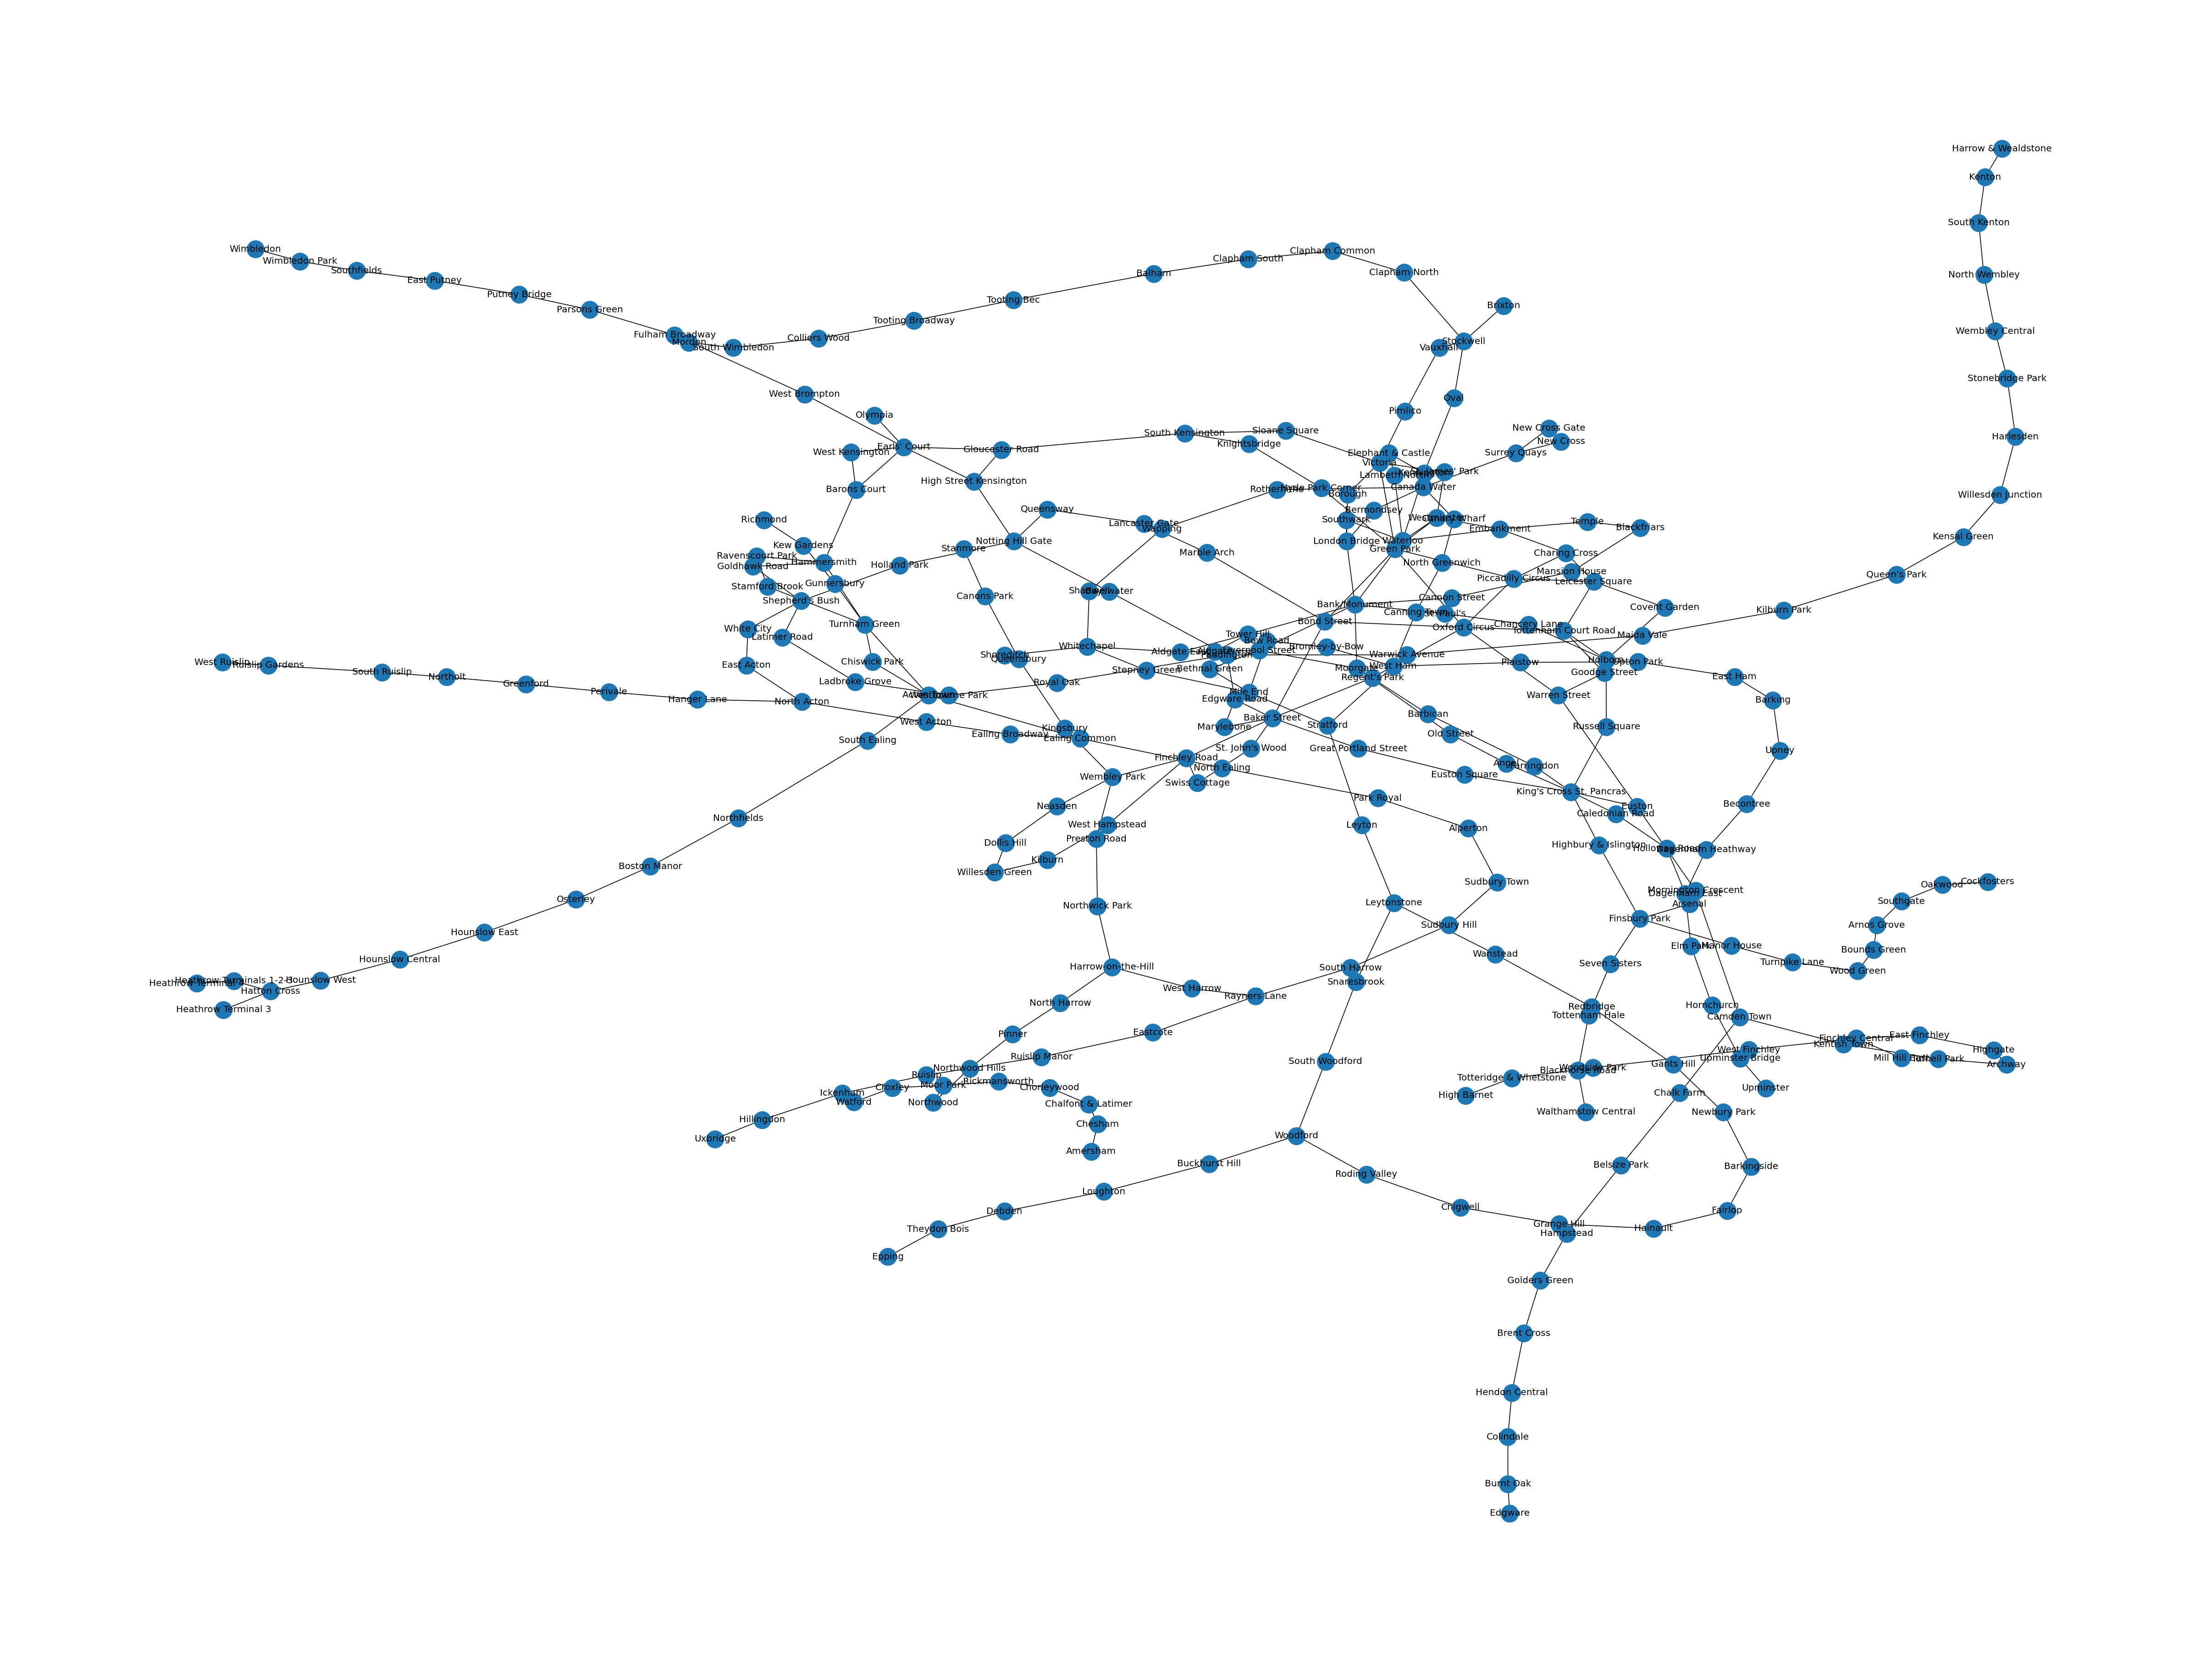

In [6]:
station_graph = nx.Graph(stations_dict)
plt.figure(figsize=(40,30))
nx.draw(station_graph, with_labels=True, node_size=500)
plt.show()

#### 2.1 Implement DFS, BFS, USC


In [7]:
## DFS

def construct_path_from_root(node, root):
    path_from_root = [node["label"]]
    cost = 0
    while node["parent"]:
        path_from_root.append(node["parent"]["label"])
        cost += node["cost"]
        node = node["parent"]
    print("Cost in Average time: ", cost)
    return list(reversed(path_from_root))

def depth_first_graph_search(nxobject, initial, goal, compute_exploration_cost=False, reverse=False):
    frontier = [{'label':initial, 'parent':None, "cost":0}]  
    explored = {initial}
    number_of_explored_nodes = 0 

    while frontier:
        node = frontier.pop()
        number_of_explored_nodes += 1
        if node["label"] == goal:
            if compute_exploration_cost == True:
                print(f"Number of explored cost: {number_of_explored_nodes}")
            return node
    
        neighbors = reversed(list(nxobject.neighbors(node['label']))) if reverse else list(nxobject.neighbors(node['label']))
        for child in neighbors:
            if child not in explored:
                frontier.append({"label":child, "parent": node, "cost":nxobject.get_edge_data(node["label"], child)["weight"]})
                explored.add(child)
    return None

In [8]:
solution = depth_first_graph_search(station_graph, 'Euston', 'Victoria', True)
construct_path_from_root(solution, 'Euston')

Number of explored cost: 124
Cost in Average time:  23


['Euston',
 'Warren Street',
 'Oxford Circus',
 'Bond Street',
 'Marble Arch',
 'Lancaster Gate',
 'Queensway',
 'Notting Hill Gate',
 'High Street Kensington',
 'Gloucester Road',
 'South Kensington',
 'Sloane Square',
 'Victoria']

In [9]:
## Just checking if the cost in average time value is correct according to the solution path

# l = ['Euston',
#  'Warren Street',
#  'Oxford Circus',
#  'Bond Street',
#  'Marble Arch',
#  'Lancaster Gate',
#  'Queensway',
#  'Notting Hill Gate',
#  'High Street Kensington',
#  'Gloucester Road',
#  'South Kensington',
#  'Sloane Square',
#  'Victoria']

# c = 0
# for i in range(len(l)-1):
#     c += station_graph.get_edge_data(l[i], l[i+1])["weight"]


In [10]:
## BFS

def breadth_first_graph_search(nxobject, initial, goal, compute_exploration_cost=False, reverse=False):
    frontier = [{'label':initial, 'parent':None, "cost":0}]  
    explored = {initial}
    number_of_explored_nodes = 0 

    while frontier:
        node = frontier.pop()
        number_of_explored_nodes += 1
        if node["label"] == goal:
            if compute_exploration_cost == True:
                print(f"Number of explored cost: {number_of_explored_nodes}")
            return node
    
        neighbors = reversed(list(nxobject.neighbors(node['label']))) if reverse else list(nxobject.neighbors(node['label']))
        for child in neighbors:
            if child not in explored:
                frontier = [{"label":child, "parent": node, "cost":nxobject.get_edge_data(node["label"], child)["weight"]}] + frontier
                explored.add(child)
    return None

In [11]:
solution = breadth_first_graph_search(station_graph, 'Euston', 'Victoria', True)
construct_path_from_root(solution, 'Euston')

Number of explored cost: 40
Cost in Average time:  7


['Euston', 'Warren Street', 'Oxford Circus', 'Green Park', 'Victoria']

In [12]:
## UCS

def uniform_cost_search(nxobject, initial, goal, compute_exploration_cost=False, reverse=False):
    frontier = [{'label':initial, 'parent':None, "cost":0}]  
    explored = {initial}
    number_of_explored_nodes = 0 

    while frontier:
        node = frontier.pop()
        number_of_explored_nodes += 1
        if node["label"] == goal:
            if compute_exploration_cost == True:
                print(f"Number of explored cost: {number_of_explored_nodes}")
            return node
    
        neighbors = reversed(list(nxobject.neighbors(node['label']))) if reverse else list(nxobject.neighbors(node['label']))
        for child in neighbors:
            if child not in explored:
                frontier = [{"label":child, "parent": node, "cost":nxobject.get_edge_data(node["label"], child)["weight"]}] + frontier
                frontier = sorted(frontier, key=lambda x:x["cost"], reverse=True)
                explored.add(child)
    return None

In [13]:
solution = uniform_cost_search(station_graph, 'Euston', 'Victoria', True)
construct_path_from_root(solution, 'Euston')

Number of explored cost: 37
Cost in Average time:  7


['Euston', 'Warren Street', 'Oxford Circus', 'Green Park', 'Victoria']

#### 2.2 Compare BFS, DFS and UCS

* Canada Water to Stratford
* New Cross Gate to Stepney Green
* Ealing Broadway to South Kensington
* Baker Street to Wembley Park

In [14]:
for start, end in [("Canada Water", "Stratford"),("New Cross Gate", "Stepney Green"),("Ealing Broadway","South Kensington"),("Baker Street","Wembley Park")]:
    print(start," ---> ",end)
    print("\nDepth First Search:")
    solution = depth_first_graph_search(station_graph, start, end, True)
    print(construct_path_from_root(solution, start))
    print("-"*100)
    print("\nBreadth First Search:")
    solution = breadth_first_graph_search(station_graph, start, end, True)
    print(construct_path_from_root(solution, start))
    print("-"*100)
    print("\nUniform Cost Search:")
    solution = uniform_cost_search(station_graph, start, end, True)
    print(construct_path_from_root(solution, start))
    print()
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>"*4)

Canada Water  --->  Stratford

Depth First Search:
Number of explored cost: 159
Cost in Average time:  121
['Canada Water', 'Bermondsey', 'London Bridge', 'Borough', 'Elephant & Castle', 'Kennington', 'Oval', 'Stockwell', 'Vauxhall', 'Pimlico', 'Victoria', 'Green Park', 'Hyde Park Corner', 'Knightsbridge', 'South Kensington', 'Gloucester Road', "Earls' Court", 'Barons Court', 'Hammersmith', 'Turnham Green', 'Acton Town', 'Ealing Common', 'North Ealing', 'Park Royal', 'Alperton', 'Sudbury Town', 'Sudbury Hill', 'South Harrow', 'Rayners Lane', 'West Harrow', 'Harrow-on-the-Hill', 'Northwick Park', 'Preston Road', 'Wembley Park', 'Finchley Road', 'Baker Street', 'Great Portland Street', 'Euston Square', "King's Cross St. Pancras", 'Angel', 'Old Street', 'Moorgate', 'Liverpool Street', 'Aldgate East', 'Whitechapel', 'Stepney Green', 'Mile End', 'Stratford']
----------------------------------------------------------------------------------------------------

Breadth First Search:
Number of 

</br>

**Comparison Between Direct and Reversed child nodes' sequence at each layer**

In [15]:
for start, end in [("Canada Water", "Stratford")]:
    print(start," ---> ",end)
    print("\nDepth First Search:")
    solution = depth_first_graph_search(station_graph, start, end, True)
    print(construct_path_from_root(solution, start))
    print("-"*100)
    print("\n(Reversed) Depth First Search:")
    solution = depth_first_graph_search(station_graph, start, end, True, True)
    print(construct_path_from_root(solution, start))
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>"*4)
    print("\nBreadth First Search:")
    solution = breadth_first_graph_search(station_graph, start, end, True)
    print(construct_path_from_root(solution, start))
    print("-"*100)
    print("\n(Reversed) Breadth First Search:")
    solution = breadth_first_graph_search(station_graph, start, end, True, True)
    print(construct_path_from_root(solution, start))
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>"*4)
    print("\nUniform Cost Search:")
    solution = uniform_cost_search(station_graph, start, end, True)
    print(construct_path_from_root(solution, start))
    print("-"*100)
    print("\n(Reversed) Uniform Cost Search:")
    solution = uniform_cost_search(station_graph, start, end, True, True)
    print(construct_path_from_root(solution, start))
    print()
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>"*4)

Canada Water  --->  Stratford

Depth First Search:
Number of explored cost: 159
Cost in Average time:  121
['Canada Water', 'Bermondsey', 'London Bridge', 'Borough', 'Elephant & Castle', 'Kennington', 'Oval', 'Stockwell', 'Vauxhall', 'Pimlico', 'Victoria', 'Green Park', 'Hyde Park Corner', 'Knightsbridge', 'South Kensington', 'Gloucester Road', "Earls' Court", 'Barons Court', 'Hammersmith', 'Turnham Green', 'Acton Town', 'Ealing Common', 'North Ealing', 'Park Royal', 'Alperton', 'Sudbury Town', 'Sudbury Hill', 'South Harrow', 'Rayners Lane', 'West Harrow', 'Harrow-on-the-Hill', 'Northwick Park', 'Preston Road', 'Wembley Park', 'Finchley Road', 'Baker Street', 'Great Portland Street', 'Euston Square', "King's Cross St. Pancras", 'Angel', 'Old Street', 'Moorgate', 'Liverpool Street', 'Aldgate East', 'Whitechapel', 'Stepney Green', 'Mile End', 'Stratford']
----------------------------------------------------------------------------------------------------

(Reversed) Depth First Search:
N

#### 2.3 Extending the Cost Function

In [16]:
## Update DFS
def update_depth_first_graph_search(nxobject, initial, goal, compute_exploration_cost=False, reverse=False, data=df):
    frontier = [{'label':initial, 'parent':None, "cost":0, "tube_line":""}]  
    explored = {initial}
    number_of_explored_nodes = 0 

    while frontier:
        node = frontier.pop()
        number_of_explored_nodes += 1
        if node["label"] == goal:
            if compute_exploration_cost == True:
                print(f"Number of explored cost: {number_of_explored_nodes}")
            return node
    
        neighbors = reversed(list(nxobject.neighbors(node['label']))) if reverse else list(nxobject.neighbors(node['label']))
        for child in neighbors:
            if child not in explored:
                
                tube_line = data[(data.loc[:,0]==node["label"])&(data.loc[:,1]==child)][2].values
                
                if (node["tube_line"] not in tube_line) and (len(tube_line) != 0):
                    node["tube_line"] = tube_line[0]
                    frontier.append({"label":child, "parent": node, "cost":2 + nxobject.get_edge_data(node["label"], child)["weight"], "tube_line":node["tube_line"]})
                else:
                    frontier.append({"label":child, "parent": node, "cost":nxobject.get_edge_data(node["label"], child)["weight"], "tube_line":node["tube_line"]})
                explored.add(child)
    return None


## Update BFS
def update_breadth_first_graph_search(nxobject, initial, goal, compute_exploration_cost=False, reverse=False, data=df):
    frontier = [{'label':initial, 'parent':None, "cost":0, "tube_line":""}]  
    explored = {initial}
    number_of_explored_nodes = 0 

    while frontier:
        node = frontier.pop()
        number_of_explored_nodes += 1
        if node["label"] == goal:
            if compute_exploration_cost == True:
                print(f"Number of explored cost: {number_of_explored_nodes}")
            return node
    
        neighbors = reversed(list(nxobject.neighbors(node['label']))) if reverse else list(nxobject.neighbors(node['label']))
        for child in neighbors:
            if child not in explored:
                # print(node["label"], child)
                tube_line = data[(data.loc[:,0]==node["label"])&(data.loc[:,1]==child)][2].values
                
                if (node["tube_line"] not in tube_line) and (len(tube_line) != 0):
                    node["tube_line"] = tube_line[0]
                    frontier = [{"label":child, "parent": node, "cost":2 + nxobject.get_edge_data(node["label"], child)["weight"], "tube_line":node["tube_line"]}] + frontier
                else:
                    frontier = [{"label":child, "parent": node, "cost":nxobject.get_edge_data(node["label"], child)["weight"], "tube_line":node["tube_line"]}] + frontier
                explored.add(child)
    return None



## Update UCS

def update_uniform_cost_search(nxobject, initial, goal, compute_exploration_cost=False, reverse=False, data=df):
    frontier = [{'label':initial, 'parent':None, "cost":0, "tube_line":""}]  
    explored = {initial}
    number_of_explored_nodes = 0 

    while frontier:
        node = frontier.pop()
        number_of_explored_nodes += 1
        if node["label"] == goal:
            if compute_exploration_cost == True:
                print(f"Number of explored cost: {number_of_explored_nodes}")
            return node
    
        neighbors = reversed(list(nxobject.neighbors(node['label']))) if reverse else list(nxobject.neighbors(node['label']))
        for child in neighbors:
            if child not in explored:
                # print(node["label"], child)
                tube_line = data[(data.loc[:,0]==node["label"])&(data.loc[:,1]==child)][2].values
                
                if (node["tube_line"] not in tube_line) and (len(tube_line) != 0):
                    node["tube_line"] = tube_line[0]
                    frontier.append({"label":child, "parent": node, "cost":2 + nxobject.get_edge_data(node["label"], child)["weight"], "tube_line":node["tube_line"]})
                else:
                    frontier.append({"label":child, "parent": node, "cost":nxobject.get_edge_data(node["label"], child)["weight"], "tube_line":node["tube_line"]})
                frontier = sorted(frontier, key=lambda x:x["cost"], reverse=True)
                explored.add(child)
    return None

**Updated and Previous Uniform Cost Search**

In [17]:
solution = update_uniform_cost_search(station_graph, 'Euston', 'Victoria', True, data=df)
construct_path_from_root(solution, 'Euston')

Number of explored cost: 53
Cost in Average time:  18


['Euston',
 'Warren Street',
 'Goodge Street',
 'Tottenham Court Road',
 'Leicester Square',
 'Charing Cross',
 'Embankment',
 'Westminster',
 "St. James' Park",
 'Victoria']

In [18]:
solution = uniform_cost_search(station_graph, 'Euston', 'Victoria', True)
construct_path_from_root(solution, 'Euston')

Number of explored cost: 37
Cost in Average time:  7


['Euston', 'Warren Street', 'Oxford Circus', 'Green Park', 'Victoria']

**Updated and Previous Breadth First Search**

In [19]:
solution = update_breadth_first_graph_search(station_graph, 'Euston', 'Victoria', True, data=df)
construct_path_from_root(solution, 'Euston')

Number of explored cost: 40
Cost in Average time:  13


['Euston', 'Warren Street', 'Oxford Circus', 'Green Park', 'Victoria']

In [20]:
solution = breadth_first_graph_search(station_graph, 'Euston', 'Victoria', True)
construct_path_from_root(solution, 'Euston')

Number of explored cost: 40
Cost in Average time:  7


['Euston', 'Warren Street', 'Oxford Circus', 'Green Park', 'Victoria']

**Updated and Previous Depth First Search**

In [21]:
solution = update_depth_first_graph_search(station_graph, 'Euston', 'Victoria', True, data=df)
construct_path_from_root(solution, 'Euston')

Number of explored cost: 124
Cost in Average time:  27


['Euston',
 'Warren Street',
 'Oxford Circus',
 'Bond Street',
 'Marble Arch',
 'Lancaster Gate',
 'Queensway',
 'Notting Hill Gate',
 'High Street Kensington',
 'Gloucester Road',
 'South Kensington',
 'Sloane Square',
 'Victoria']

In [22]:
solution = depth_first_graph_search(station_graph, 'Euston', 'Victoria', True)
construct_path_from_root(solution, 'Euston')

Number of explored cost: 124
Cost in Average time:  23


['Euston',
 'Warren Street',
 'Oxford Circus',
 'Bond Street',
 'Marble Arch',
 'Lancaster Gate',
 'Queensway',
 'Notting Hill Gate',
 'High Street Kensington',
 'Gloucester Road',
 'South Kensington',
 'Sloane Square',
 'Victoria']

#### 2.4 Heuristic Search

In [23]:
df

,0,1,2,3,4,5
0,Harrow & Wealdstone,Kenton,Bakerloo,3,5,0
1,Kenton,South Kenton,Bakerloo,2,4,0
2,South Kenton,North Wembley,Bakerloo,2,4,0
3,North Wembley,Wembley Central,Bakerloo,2,4,0
4,Wembley Central,Stonebridge Park,Bakerloo,3,4,0
...,...,...,...,...,...,...
369,Victoria,Pimlico,Victoria,3,1,0
370,Pimlico,Vauxhall,Victoria,1,1,0
371,Vauxhall,Stockwell,Victoria,3,1,2
372,Stockwell,Brixton,Victoria,2,2,0


In [24]:
def heuristic_preprocessing(zone_dict):
    ## Mapper to create the string values of 1,2,3,4,5,6,a,b,c,d in integer values to perform calculations on.
    zone_mapper = {'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'a':7,'b':8,'c':9,'d':10}
    zones_dict = dict()
    for i,j in zone_dict.items():
        temp = list()
        for k in j:
            k = zone_mapper[k]
            temp.append(k)
        k = sum(temp)/len(temp)
        zones_dict[i] = k
    return zones_dict

def heuristics(zones_dict, start:str,  end:str):   
    start_zone = zones_dict[start]
    end_zone = zones_dict[end]
    return abs(end_zone-start_zone)

In [25]:
zones_dict = heuristic_preprocessing(zone_dict)

In [26]:
zones_dict

{'Harrow & Wealdstone': 5.0,
 'Kenton': 4.5,
 'South Kenton': 4.0,
 'North Wembley': 4.0,
 'Wembley Central': 4.0,
 'Stonebridge Park': 3.5,
 'Harlesden': 3.0,
 'Willesden Junction': 3.0,
 'Kensal Green': 2.5,
 "Queen's Park": 2.0,
 'Kilburn Park': 2.0,
 'Maida Vale': 2.0,
 'Warwick Avenue': 2.0,
 'Paddington': 1.5,
 'Edgware Road': 1.0,
 'Marylebone': 1.0,
 'Baker Street': 1.5,
 "Regent's Park": 1.0,
 'Oxford Circus': 1.0,
 'Piccadilly Circus': 1.0,
 'Charing Cross': 1.0,
 'Embankment': 1.0,
 'Waterloo': 1.0,
 'Lambeth North': 1.0,
 'Elephant & Castle': 1.5,
 'West Ruislip': 6.0,
 'Ruislip Gardens': 5.5,
 'South Ruislip': 5.0,
 'Northolt': 5.0,
 'Greenford': 4.5,
 'Perivale': 4.0,
 'Hanger Lane': 3.5,
 'North Acton': 2.5,
 'Ealing Broadway': 3.0,
 'West Acton': 3.0,
 'East Acton': 2.5,
 'White City': 2.0,
 "Shepherd's Bush": 2.0,
 'Holland Park': 2.0,
 'Notting Hill Gate': 1.5,
 'Queensway': 1.5,
 'Lancaster Gate': 1.0,
 'Marble Arch': 1.0,
 'Bond Street': 1.0,
 'Tottenham Court Road'

In [27]:
heuristics(zones_dict, "Vauxhall", "Stockwell")

0.5

In [28]:
def best_first_search(nxobject, initial, goal, compute_exploration_cost=False, reverse=False, zones_dict=zones_dict):
    frontier = [{'label':initial, 'parent':None, "cost":0, 'heuristic':0.0}]  
    explored = {initial}
    number_of_explored_nodes = 0 

    while frontier:
        node = frontier.pop()
        number_of_explored_nodes += 1
        if node["label"] == goal:
            if compute_exploration_cost == True:
                print(f"Number of explored cost: {number_of_explored_nodes}")
            return node
    
        neighbors = reversed(list(nxobject.neighbors(node['label']))) if reverse else list(nxobject.neighbors(node['label']))
        for child in neighbors:
            if child not in explored:
                frontier = [{"label":child, "parent": node, "cost":nxobject.get_edge_data(node["label"], child)["weight"], 'heuristic':heuristics(zones_dict, node["label"], child)}] + frontier
                frontier = sorted(frontier, key=lambda x:x["heuristic"], reverse=True)
                explored.add(child)
    return None

In [29]:
solution = best_first_search(station_graph, 'Euston', 'Victoria', True)
construct_path_from_root(solution, 'Euston')

Number of explored cost: 20
Cost in Average time:  7


['Euston', 'Warren Street', 'Oxford Circus', 'Green Park', 'Victoria']

In [30]:
solution = uniform_cost_search(station_graph, 'Euston', 'Victoria', True)
construct_path_from_root(solution, 'Euston')

Number of explored cost: 37
Cost in Average time:  7


['Euston', 'Warren Street', 'Oxford Circus', 'Green Park', 'Victoria']

### 3. Genetic Algorithms

#### 3.1 Implement a Genetic Algorithm

In [31]:
from hints import closeness
scores = closeness(["___TEST___"], "ec22146")
scores

{'___TEST___': 0.4051786561226408}

In [32]:
from deap import base, tools, algorithms, creator
import random
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def chromosome_choice():
    available = "_ 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z"
    available = available.split(" ")
    return available

In [34]:
## Function Testing
available = chromosome_choice()
print(available)

['_', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [35]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [36]:
def evaluator(individual):
    individual = "".join(individual)
    result = closeness([individual], "ec22146")[individual]
    return result,

In [37]:
def get_value():
    available = chromosome_choice()
    return random.choice(list(available))

In [38]:
def mutation(chrs,prob=0.05):
    for i in range(len(chrs)):
        if random.random()<prob:
            chrs[i] = get_value()
    return chrs,    

In [39]:
## Function Testing
get_value()

'Y'

In [40]:
toolbox = base.Toolbox()

In [41]:
toolbox.register("fill_value", get_value)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.fill_value, n=10)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

*Please Refer to Experiments shown below (3.4) to clarify why hyperparameters for **selection tournament size** and **population size** are selected as:* **tournsize = 5** *&* **n=300** *respectively*

In [42]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", mutation, prob=0.02)
toolbox.register("select", tools.selTournament, tournsize=5)
toolbox.register("evaluate", evaluator)

In [43]:
pop = toolbox.population(n=300)

In [44]:
## Framework Testing
t = pop[1]
evaluator(t)

(0.4825060667251849,)

In [45]:
result = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, 
                             ngen=10, verbose=True)

gen	nevals
0  	300   
1  	174   
2  	160   
3  	162   
4  	178   
5  	177   
6  	166   
7  	176   
8  	184   
9  	189   
10 	182   


In [46]:
print('Current best fitness:', evaluator(tools.selBest(result[0], k=1)[0]))

Current best fitness: (0.9270675042510528,)


In [47]:
result = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, 
                             ngen=50, verbose=False)
print('Current best fitness:', evaluator(tools.selBest(result[0], k=1)[0]))

Current best fitness: (0.9854135008502105,)


*Please Refer to Experiments shown below (3.3) to clarify why hyperparameter:* **ngen = 100**

In [48]:
result = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, 
                             ngen=100, verbose=False)
print('Current best fitness:', evaluator(tools.selBest(result[0], k=1)[0]))
final_individual = tools.selBest(result[0], k=1)
print(final_individual)
print()
print(f"Answer String (ec22146):  ","".join(final_individual[0]))

Current best fitness: (1.0,)
[['W', 'S', '9', '9', 'A', 'X', 'B', 'Q', 'N', '1']]

Answer String (ec22146):   WS99AXBQN1


---

### Experimentation for 3.3 and 3.4

#### 3.3

Mean: `np.mean()`\
Variance: `np.var()`

In [49]:
## Number of Generations (Reproductions) == 50

f_values = []
for i in range(5):
    toolbox = base.Toolbox()
    toolbox.register("fill_value", get_value)
    toolbox.register("individual", tools.initRepeat, creator.Individual,
                     toolbox.fill_value, n=10)
    toolbox.register("population", tools.initRepeat, list, 
                     toolbox.individual)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", mutation, prob=0.02)
    toolbox.register("select", tools.selTournament, tournsize=5)
    toolbox.register("evaluate", evaluator)
    pop = toolbox.population(n=300)

    result = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, 
                                 ngen=50, verbose=False)
    f_value = evaluator(tools.selBest(result[0], k=1)[0])
    f_values.append(f_value[0])
    print('Current best fitness:',f_value[0])
print(f_values)

Current best fitness: 0.9708270017004211
Current best fitness: 0.9854135008502105
Current best fitness: 0.9854135008502105
Current best fitness: 1.0
Current best fitness: 1.0
[0.9708270017004211, 0.9854135008502105, 0.9854135008502105, 1.0, 1.0]


In [50]:
np.mean(f_values)

0.9883308006801684

In [51]:
np.var(f_values)

0.00011914893617021252

In [52]:
## Number of Generations (Reproductions) == 60

f_values = []
for i in range(5):
    toolbox = base.Toolbox()
    toolbox.register("fill_value", get_value)
    toolbox.register("individual", tools.initRepeat, creator.Individual,
                     toolbox.fill_value, n=10)
    toolbox.register("population", tools.initRepeat, list, 
                     toolbox.individual)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", mutation, prob=0.02)
    toolbox.register("select", tools.selTournament, tournsize=5)
    toolbox.register("evaluate", evaluator)
    pop = toolbox.population(n=300)

    result = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, 
                                 ngen=60, verbose=False)
    f_value = evaluator(tools.selBest(result[0], k=1)[0])
    f_values.append(f_value[0])
    print('Current best fitness:',f_value[0])
print(f_values)

Current best fitness: 0.9854135008502105
Current best fitness: 1.0
Current best fitness: 0.9854135008502105
Current best fitness: 1.0
Current best fitness: 1.0
[0.9854135008502105, 1.0, 0.9854135008502105, 1.0, 1.0]


In [53]:
np.mean(f_values)

0.9941654003400842

In [54]:
np.var(f_values)

5.106382978723428e-05

In [66]:
## Number of Generations (Reproductions) == 80

f_values = []
for i in range(5):
    toolbox = base.Toolbox()
    toolbox.register("fill_value", get_value)
    toolbox.register("individual", tools.initRepeat, creator.Individual,
                     toolbox.fill_value, n=10)
    toolbox.register("population", tools.initRepeat, list, 
                     toolbox.individual)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", mutation, prob=0.02)
    toolbox.register("select", tools.selTournament, tournsize=5)
    toolbox.register("evaluate", evaluator)
    pop = toolbox.population(n=300)

    result = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, 
                                 ngen=80, verbose=False)
    f_value = evaluator(tools.selBest(result[0], k=1)[0])
    f_values.append(f_value[0])
    print('Current best fitness:',f_value[0])
print(f_values)

Current best fitness: 0.9854135008502105
Current best fitness: 1.0
Current best fitness: 1.0
Current best fitness: 0.9854135008502105
Current best fitness: 1.0
[0.9854135008502105, 1.0, 1.0, 0.9854135008502105, 1.0]


In [67]:
np.mean(f_values)

0.9941654003400842

In [68]:
np.var(f_values)

5.106382978723428e-05

In [69]:
## Number of Generations (Reproductions) == 100

f_values = []
for i in range(5):
    toolbox = base.Toolbox()
    toolbox.register("fill_value", get_value)
    toolbox.register("individual", tools.initRepeat, creator.Individual,
                     toolbox.fill_value, n=10)
    toolbox.register("population", tools.initRepeat, list, 
                     toolbox.individual)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", mutation, prob=0.02)
    toolbox.register("select", tools.selTournament, tournsize=5)
    toolbox.register("evaluate", evaluator)
    pop = toolbox.population(n=300)

    result = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, 
                                 ngen=100, verbose=False)
    f_value = evaluator(tools.selBest(result[0], k=1)[0])
    f_values.append(f_value[0])
    print('Current best fitness:',f_value[0])
print(f_values)

Current best fitness: 1.0
Current best fitness: 1.0
Current best fitness: 1.0
Current best fitness: 1.0
Current best fitness: 1.0
[1.0, 1.0, 1.0, 1.0, 1.0]


In [70]:
np.mean(f_values)

1.0

In [71]:
np.var(f_values)

0.0

#### 3.4

In [73]:
## Experiment with the population size

eval_values = []
for pop_value in [50,100,150,200,250,300]:
    f_values = []
    for i in range(5):
        toolbox = base.Toolbox()
        toolbox.register("fill_value", get_value)
        toolbox.register("individual", tools.initRepeat, creator.Individual,
                         toolbox.fill_value, n=10)
        toolbox.register("population", tools.initRepeat, list, 
                         toolbox.individual)
        toolbox.register("mate", tools.cxTwoPoint)
        toolbox.register("mutate", mutation, prob=0.02)
        toolbox.register("select", tools.selTournament, tournsize=5)
        toolbox.register("evaluate", evaluator)
        pop = toolbox.population(n=pop_value)

        result = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, 
                                     ngen=50, verbose=False)
        f_value = evaluator(tools.selBest(result[0], k=1)[0])
        f_values.append(f_value[0])
    print('Current best fitness:',np.mean(f_values))
    eval_values.append(np.mean(f_values))

Current best fitness: 0.8731998610881998
Current best fitness: 0.9130553671193093
Current best fitness: 0.9596583319003928
Current best fitness: 0.9771621308801401
Current best fitness: 0.9766616013603369
Current best fitness: 0.990039715355049


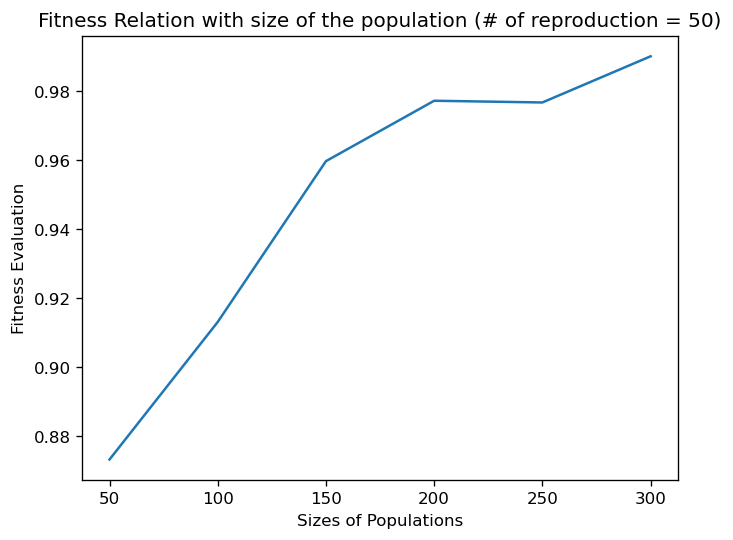

In [74]:
plt.plot([50,100,150,200,250,300],eval_values)
plt.title("Fitness Relation with size of the population (# of reproduction = 50)")
plt.ylabel("Fitness Evaluation")
plt.xlabel("Sizes of Populations")
plt.show()

In [75]:
## Experiment with the selection tournament size

eval_values = []
for t_size in [2,3,4,5,6,7]:
    f_values = []
    for i in range(5):
        toolbox = base.Toolbox()
        toolbox.register("fill_value", get_value)
        toolbox.register("individual", tools.initRepeat, creator.Individual,
                         toolbox.fill_value, n=10)
        toolbox.register("population", tools.initRepeat, list, 
                         toolbox.individual)
        toolbox.register("mate", tools.cxTwoPoint)
        toolbox.register("mutate", mutation, prob=0.02)
        toolbox.register("select", tools.selTournament, tournsize=t_size)
        toolbox.register("evaluate", evaluator)
        pop = toolbox.population(n=pop_value)

        result = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, 
                                     ngen=50, verbose=False)
        f_value = evaluator(tools.selBest(result[0], k=1)[0])
        f_values.append(f_value[0])
    print('Current best fitness:',np.mean(f_values))
    eval_values.append(np.mean(f_values))

Current best fitness: 0.9941654003400842
Current best fitness: 0.990039715355049
Current best fitness: 0.9883308006801684
Current best fitness: 0.9941654003400842
Current best fitness: 0.9883308006801684
Current best fitness: 0.9824962010202526


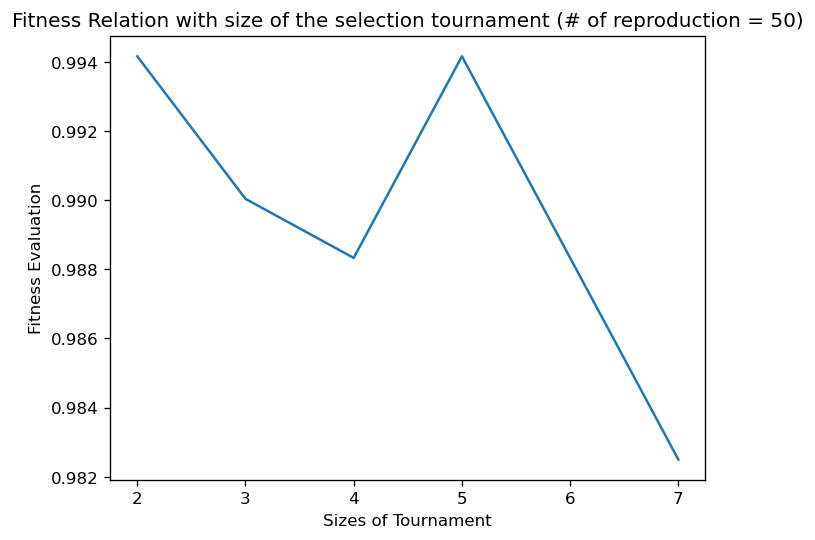

In [76]:
plt.plot([2,3,4,5,6,7],eval_values)
plt.title("Fitness Relation with size of the selection tournament (# of reproduction = 50)")
plt.ylabel("Fitness Evaluation")
plt.xlabel("Sizes of Tournament")
plt.show()

---